<a href="https://colab.research.google.com/github/nazalan/OnalloLaboratorium/blob/main/ExchangeRateTimeSeriesEurHuf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euro to HUF Conversion - Time Series Analysis

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vph7cth/exz5pgts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vph7cth/fedxxmj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21400', 'data', 'file=/tmp/tmp1vph7cth/exz5pgts.json', 'init=/tmp/tmp1vph7cth/fedxxmj_.json', 'output', 'file=/tmp/tmp1vph7cth/prophet_model2tqj_clq/prophet_model-20240304165352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


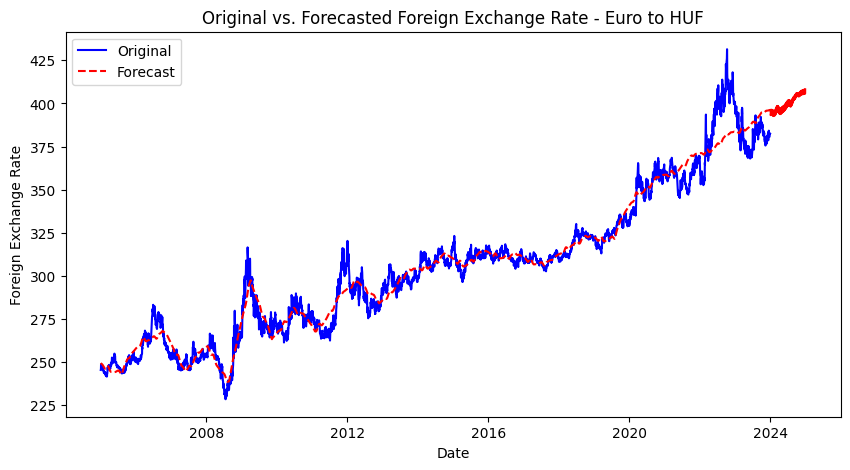

Mean Absolute Error (MAE): 5.339861066947446
Mean Squared Error (MSE): 59.77734368074483
Root Mean Squared Error (RMSE): 7.731580930233145
Forecast results saved to forecast_results.csv


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings('ignore')

# Adatok beolvasása és előkészítése
os.chdir('/content/sample_data')
table_sum = pd.read_csv('EUR_HUF Historical Data 05-24.csv')
df = table_sum[["Date", "Price"]]
df.rename(columns={"Price": "Value"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")

# Fordítás a DataFrame-en az idő oszlop alapján
df = df[::-1].reset_index(drop=True)

# Dátumformátum átalakítása és időindex létrehozása
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Prophet modell létrehozása és illesztése
model = Prophet(changepoint_prior_scale=0.5)
model.fit(df)

# Jövőbeli időpontok előrejelzése
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

# Eredeti és előrejelzett értékek diagramon
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Original', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red', linestyle='dashed')
plt.title('Original vs. Forecasted Foreign Exchange Rate - Euro to HUF')
plt.xlabel('Date')
plt.ylabel('Foreign Exchange Rate')
plt.legend()
plt.show()

# Hiba metrikák kiszámítása
y_true = df['y'].append(forecast[forecast['ds'].isin(df['ds']) == False]['yhat'])
y_pred = forecast['yhat']
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Eredeti adatok hozzáadása a forecast DataFrame-hez
forecast_with_actuals = pd.concat([df[['ds', 'y']], forecast[['ds', 'yhat']]], ignore_index=True)

# Táblázat készítése és CSV fájlba mentése
evaluation_results = pd.DataFrame({'Date': forecast_with_actuals['ds'], 'Actual': forecast_with_actuals['y'], 'Forecast': forecast_with_actuals['yhat']})
evaluation_results.to_csv('forecast_results.csv', index=False)
print("Forecast results saved to forecast_results.csv")


